#Imports

In [2]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

#Problem description and scenario

##Scenario


About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

##Dataset and column explanation


In [3]:
uploaded = files.upload()
uloadedDesc = files.upload()

Saving country-data.csv to country-data (2).csv


Saving data-dictionary.csv to data-dictionary (1).csv


In [14]:
df = pd.read_csv('country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
df_desc = pd.read_csv('data-dictionary.csv')
df_desc.style.set_properties(subset=['Description'], **{'width': '400'})


,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [117]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#Preprocessing

We can see that the dataset is clean

In [15]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [119]:
f.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

We are dropping country column since it won't be of any use to us for further processing, but we are going to use it later on and merge it back when we provide final labels for our countries.

In [16]:
df_countries = pd.DataFrame()
df_countries['country']= df['country']
df.drop(['country'], axis = 1, inplace = True)

#EDA

##Scatter plots

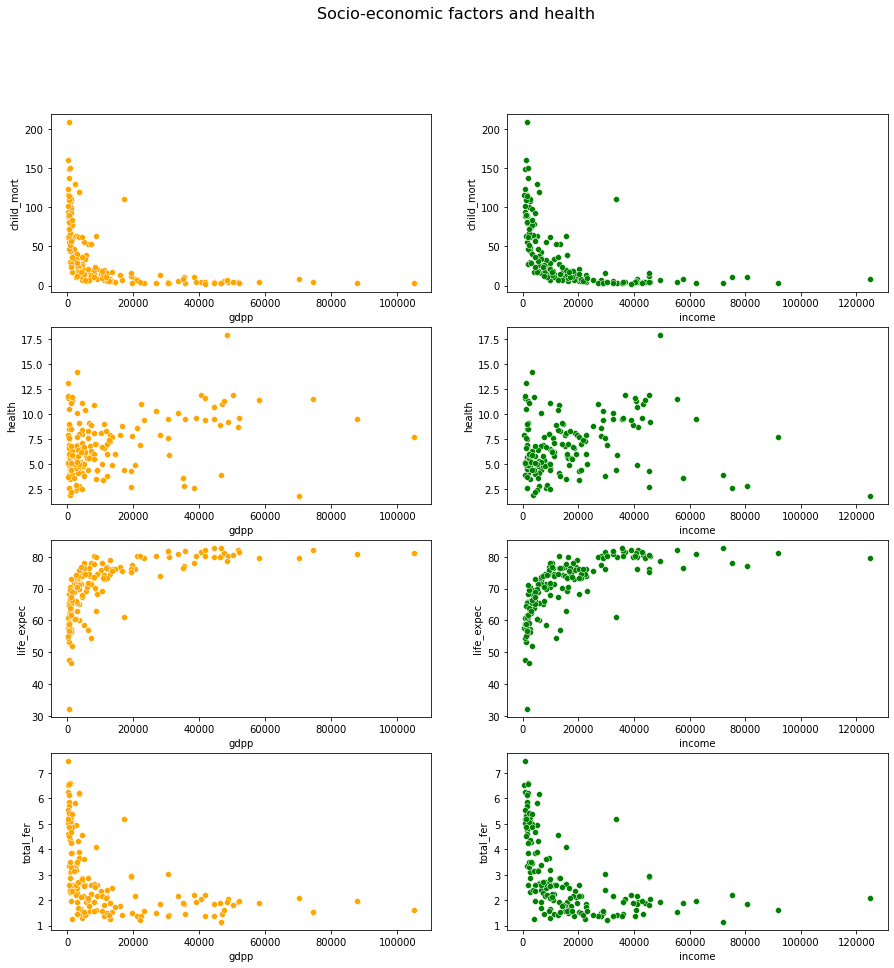

In [121]:
fig, axes = plt.subplots(4,2, figsize = (15,15))
fig.suptitle('Socio-economic factors and health', fontsize=16)
sns.scatterplot(x = df['gdpp'], y = df['child_mort'], ax = axes[0,0], color = 'orange')
sns.scatterplot(x = df['income'], y = df['child_mort'], ax = axes[0,1], color = 'green')
sns.scatterplot(x = df['gdpp'], y = df['health'], ax = axes[1,0], color = 'orange')
sns.scatterplot(x = df['income'], y = df['health'], ax = axes[1,1], color = 'green')
sns.scatterplot(x = df['gdpp'], y = df['life_expec'], ax = axes[2,0], color = 'orange')
sns.scatterplot(x = df['income'], y = df['life_expec'], ax = axes[2,1], color = 'green')
sns.scatterplot(x = df['gdpp'], y = df['total_fer'], ax = axes[3,0], color = 'orange')
sns.scatterplot(x = df['income'], y = df['total_fer'], ax = axes[3,1], color = 'green')

plt.show()

##Correlation matrix - Heatmap

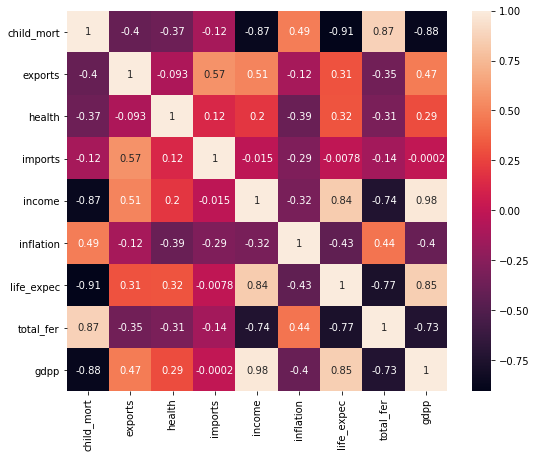

In [19]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(method='spearman',), square=True, annot=True, )
plt.show()



*   Children mortality:
  *   We can see that children mortality is highly correlated with GDPP and Income in inverse manner. Which is logical because income and GDPP can be almost used interchangeably and as both of them get smaller, the country's economic power is lower and it's healthcare follows that donwards spiral. Which results in high mortality of children. 
  * High correlation with fertility can be explained by reasoning which states that because of high morality of children, people are more prone to giving birth to more children since how many children will survive is uncertain.
*   Total fertility
  * Correlation which GDPP, the characteristic of underdeveloped and poor country's is that they have much more children, than highly developed ones.




#Scaling

In [17]:
mx = MinMaxScaler()
df_sc = mx.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns = df.columns)

#KMeans

##Inertia, Silhouette and Davies-Bouldin score

In [22]:

inertia = []
db = []
sil_scores = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters = i, random_state = 123).fit(df_sc)
  inertia.append(kmeans.inertia_)
for i in range(2,10):
    km = KMeans(n_clusters=i, random_state= 123)
    km.fit(df_sc)
    sil_scores.append(silhouette_score(df_sc, km.labels_))
    db.append(davies_bouldin_score(df_sc, km.labels_))

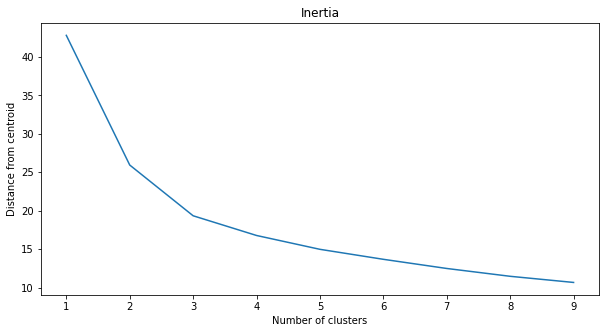

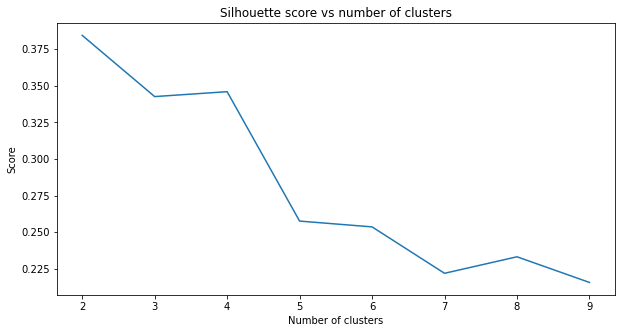

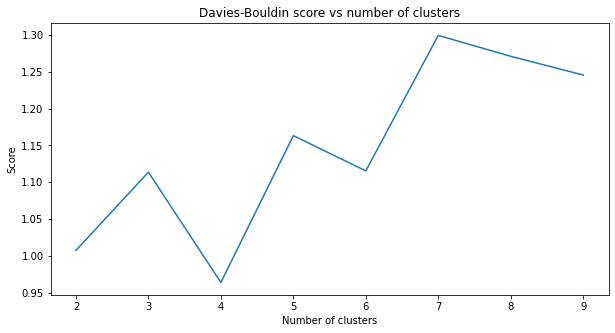

In [62]:
plt.figure(figsize = (10,5))
plt.plot([i for i in range(1,10)], inertia)
plt.title("Inertia")
plt.xlabel("Number of clusters")
plt.ylabel("Distance from centroid")
plt.show()

plt.figure(figsize = (10,5))
plt.title("Silhouette score vs number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.plot([i for i in range(2,10)], sil_scores)
plt.show()

plt.figure(figsize = (10,5))
plt.title("Davies-Bouldin score vs number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.plot([i for i in range(2,10)], db)
plt.show()

Elbow analysis shows us that three clusters is optimal number while silhouette score and Davies-Bouldin score show us respectively, that two and four clusters are more viable solutions. But since we are going for explainable clusters we are going to opt in for three clusters as our final number of clusters.

##Clusters and labels

In [18]:

model = KMeans(n_clusters = 3, random_state= 123)
model.fit(df_sc)
labels = model.predict(df_sc)

centroids = mx.inverse_transform(model.cluster_centers_[:,:9])
df_inv = pd.DataFrame(mx.inverse_transform(df_sc), columns = df_sc.columns)
df_inv['Country type'] = labels
#Labels Developing, Underdeveloped and Developed are introduced after original 0,1,2 labels provided by KMeans were plotted and accordingly to what they represent on the plot were assigned.
df_inv.loc[df_inv['Country type'] == 0, 'Country type'] = 'Developing'
df_inv.loc[df_inv['Country type'] == 1, 'Country type'] = 'Underdeveloped'
df_inv.loc[df_inv['Country type'] == 2, 'Country type'] = 'Developed'
result = pd.concat([df_countries, df_inv], axis = 1)
result

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country type
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Underdeveloped
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Underdeveloped
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,Developing
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0,Developing
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,Developing
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,Underdeveloped


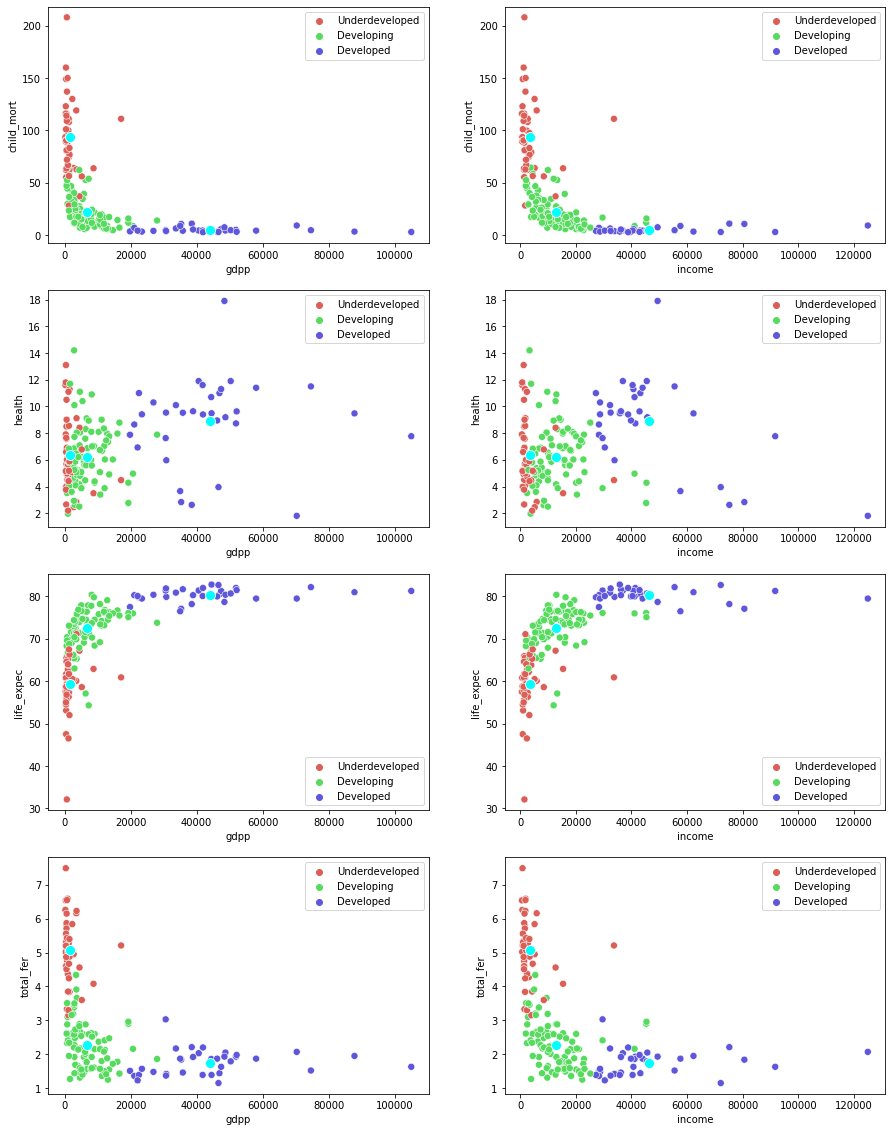

In [19]:
ig, axes = plt.subplots(4,2, figsize = (15,20), gridspec_kw={'width_ratios': [1, 1]})
sns.scatterplot(x = df_inv['gdpp'], y = df_inv['child_mort'], ax = axes[0,0], hue = df_inv['Country type'], palette=sns.color_palette("hls",3), s = 50)
sns.scatterplot(x = centroids[:, 8], y = centroids[:, 0], ax = axes[0,0], marker = 'o', s = 100, color = 'cyan')
sns.scatterplot(x = df_inv['income'], y = df_inv['child_mort'], ax = axes[0,1], hue = df_inv['Country type'], palette=sns.color_palette("hls",3), s = 50)
sns.scatterplot(x = centroids[:, 4], y = centroids[:, 0], ax = axes[0,1], marker = 'o', s = 100, color = 'cyan')

sns.scatterplot(x = df_inv['gdpp'], y = df_inv['health'], ax = axes[1,0], hue = df_inv['Country type'], palette=sns.color_palette("hls",3), s = 50)
sns.scatterplot(x = centroids[:, 8], y = centroids[:, 2], ax = axes[1,0], marker = 'o', s = 100, color = 'cyan')
sns.scatterplot(x = df_inv['income'], y = df_inv['health'], ax = axes[1,1], hue = df_inv['Country type'], palette=sns.color_palette("hls",3), s = 50)
sns.scatterplot(x = centroids[:, 4], y = centroids[:, 2], ax = axes[1,1], marker = 'o', s = 100, color = 'cyan')

sns.scatterplot(x = df_inv['gdpp'], y = df_inv['life_expec'], ax = axes[2,0], hue = df_inv['Country type'], palette=sns.color_palette("hls",3), s = 50)
sns.scatterplot(x = centroids[:, 8], y = centroids[:, 6], ax = axes[2,0], marker = 'o', s = 100, color = 'cyan')
sns.scatterplot(x = df_inv['income'], y = df_inv['life_expec'], ax = axes[2,1], hue = df_inv['Country type'], palette=sns.color_palette("hls",3), s = 50)
sns.scatterplot(x = centroids[:, 4], y = centroids[:, 6], ax = axes[2,1], marker = 'o', s = 100, color = 'cyan')

sns.scatterplot(x = df_inv['gdpp'], y = df_inv['total_fer'], ax = axes[3,0], hue = df_inv['Country type'], palette=sns.color_palette("hls",3), s = 50)
sns.scatterplot(x = centroids[:, 8], y = centroids[:, 7], ax = axes[3,0], marker = 'o', s = 100, color = 'cyan')
sns.scatterplot(x = df_inv['income'], y = df_inv['total_fer'], ax = axes[3,1], hue = df_inv['Country type'], palette=sns.color_palette("hls",3), s = 50)
sns.scatterplot(x = centroids[:, 4], y = centroids[:, 7], ax = axes[3,1], marker = 'o', s = 100, color = 'cyan')

plt.show()


#Hierarchical clustering

Since we are happy with the results provided by KMeans, Anglomerative clustering is used just for demonstration purposes to show how we could decide the number of clusters by using distance threshold as our method for optimal decisioning.

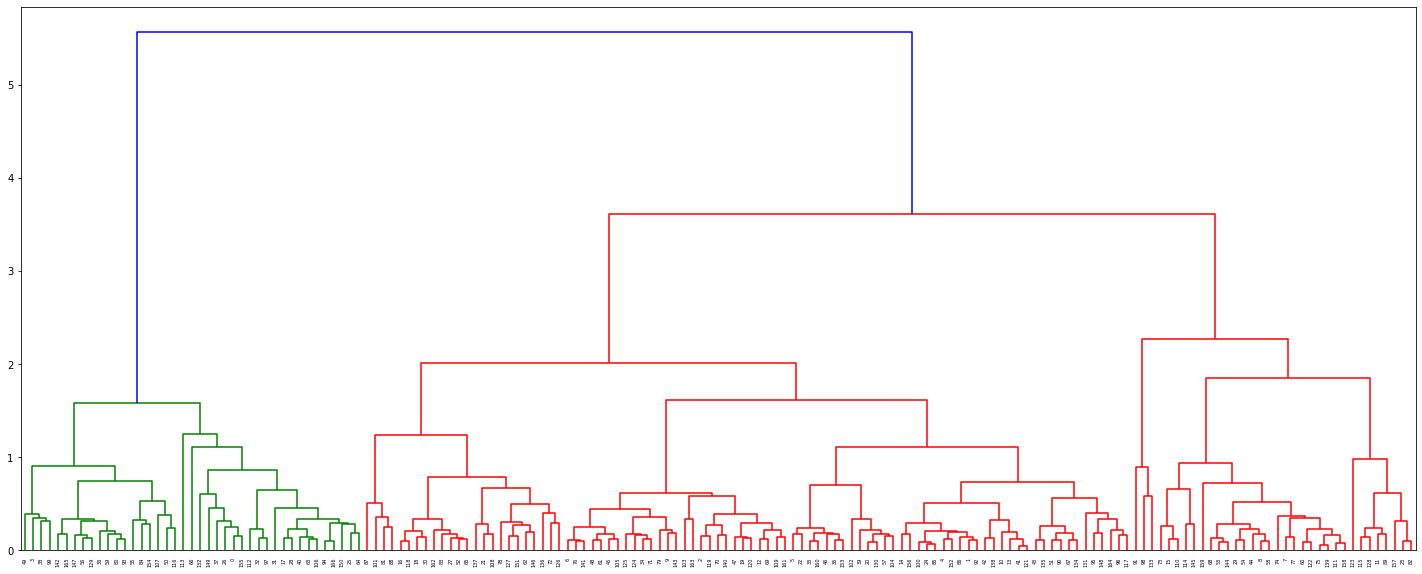

In [26]:
Z = linkage(df_sc, 'ward')
plt.figure(figsize = (25,10))
dendrogram(Z)
plt.show()

In [39]:
model = AgglomerativeClustering(distance_threshold = 3, n_clusters= None)
model.fit(df_sc)
silhouette_score(df_sc,model.labels_)

0.31627506051649634